In [ ]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# !wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
# !wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2024-01-11 06:54:19--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat.2’

train_32x32.mat.2   100%[===================>] 173.61M  26.2MB/s    in 7.5s    

2024-01-11 06:54:26 (23.0 MB/s) - ‘train_32x32.mat.2’ saved [182040794/182040794]

--2024-01-11 06:54:26--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat.2’

test_32x32.mat.2    100%[===================>]  61.30M  20.1MB/s    in 3.2s    

2024-01-11 06:54:30 (19.2 MB/s) - ‘test_32x32.mat.2’ saved [642

In [ ]:
data_train = loadmat("train_32x32.mat")
data_test = loadmat("test_32x32.mat")

## EDA

In [ ]:
data_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[[[ 33,  84,  19, ...,  92, 190, 216],
          [ 30,  76,  54, ...,  78, 188, 217],
          [ 38,  59, 110, ..., 101, 191, 212]],
 
         [[ 15,  86,  20, ...,  94, 205, 221],
          [ 23,  73,  52, ...,  82, 203, 222],
          [ 19,  66, 111, ..., 105, 206, 217]],
 
         [[ 15,  77,  25, ..., 114, 220, 226],
          [ 17,  78,  57, ..., 101, 218, 227],
          [ 19,  56, 116, ..., 125, 220, 221]],
 
         ...,
 
         [[ 72,  90,  65, ..., 200, 229, 200],
          [ 65,  78, 144, ..., 201, 231, 199],
          [ 56,  69, 223, ..., 203, 224, 191]],
 
         [[ 82,  88,  78, ..., 192, 229, 193],
          [ 77,  77, 148, ..., 193, 229, 188],
          [ 57,  67, 218, ..., 195, 224, 182]],
 
         [[ 89,  88,  98, ..., 190, 229, 197],
          [ 79,  78, 158, ..., 191, 228, 189],
          [ 59,  66, 220, 

In [ ]:
type(data_train)

dict

In [ ]:
# Every dictionary has 3 attributes: .items(), .keys(), .values()
data_train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [ ]:
data_test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [ ]:
X_train = data_train['X']
X_test = data_test['X']

y_train = data_train['y']
y_test = data_test['y']


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train.shape

(32, 32, 3, 73257)

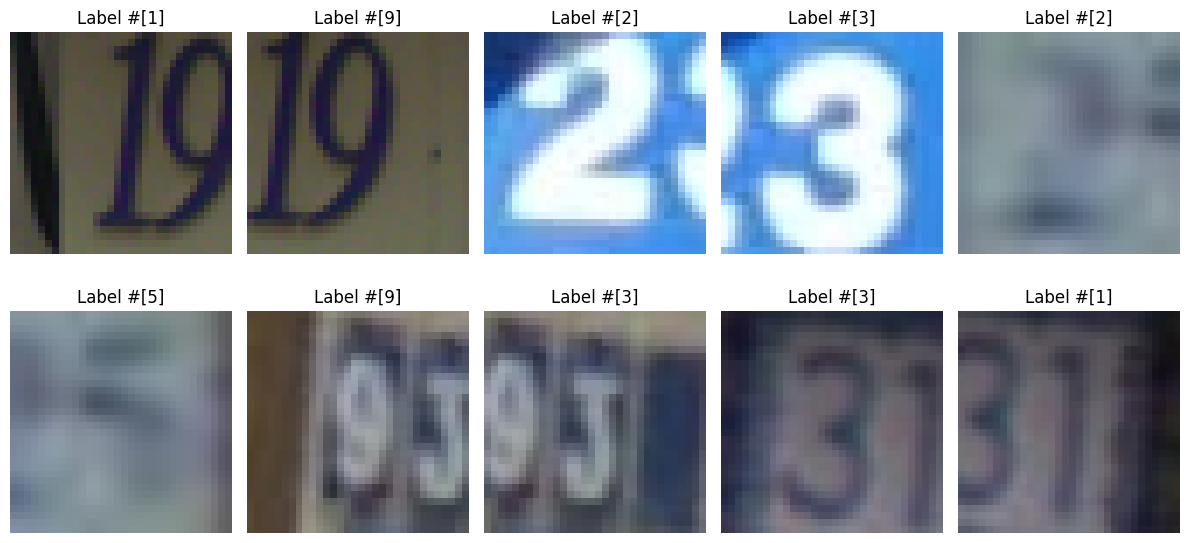

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12,6))
axes = axes.ravel() #flatten axes for easy indexing

for i in range(10):

    img = X_train[:, :, :, i]

    axes[i].imshow(img)
    axes[i].set_title(f"Label #{y_train[i]}")
    axes[i].axis("off") # remove ticks from axis

plt.tight_layout()
plt.show()

In [ ]:
# Trun the previous code into function
def image_vis(X, y):
    fig, axes = plt.subplots(2, 5, figsize=(12,6))
    axes = axes.ravel() #flatten axes for easy indexing

    for i in range(10):

        img = X[:, :, :, i]

        axes[i].imshow(img)
        axes[i].set_title(f"Label #{y[i]}")
        axes[i].axis("off") # remove ticks from axis

    plt.tight_layout()
    plt.show()

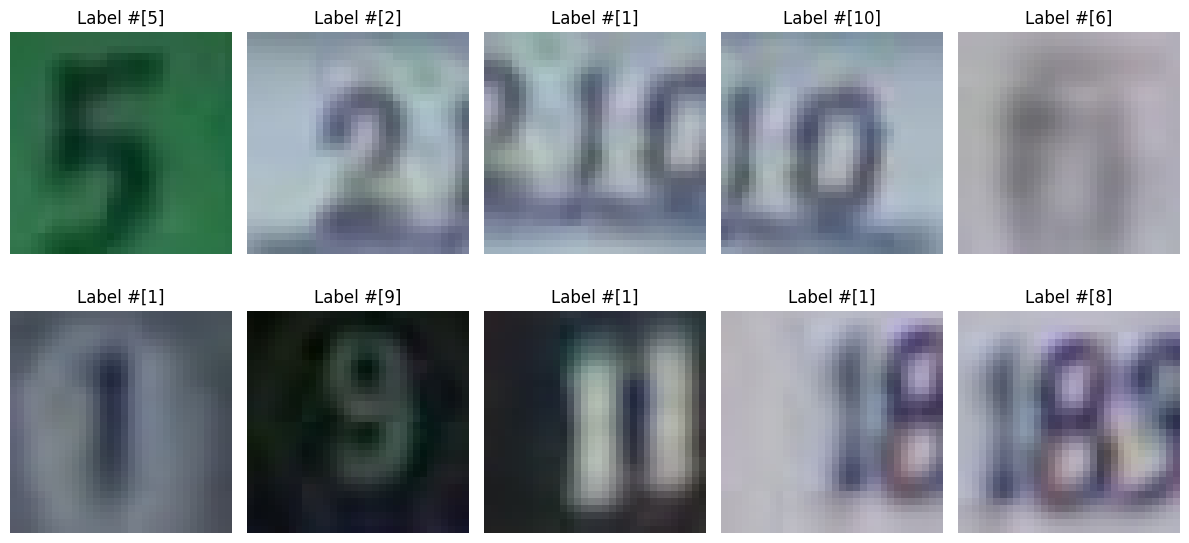

In [ ]:
image_vis(X_test, y_test)

In [ ]:
# check the y distribution to see if dataset is imbalanced

np.unique(y_train, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8),
 array([13861, 10585,  8497,  7458,  6882,  5727,  5595,  5045,  4659,
         4948]))

In [ ]:
unique_labels, counts = np.unique(y_train, return_counts=True)
train_label_dist =  dict(zip(unique_labels, counts))
train_label_dist

{1: 13861,
 2: 10585,
 3: 8497,
 4: 7458,
 5: 6882,
 6: 5727,
 7: 5595,
 8: 5045,
 9: 4659,
 10: 4948}

In [ ]:
# Turn the previous code  to function
def label_dist(y):
    unique_labels, counts = np.unique(y_train, return_counts=True)
    return dict(zip(unique_labels, counts))

In [ ]:
train_dist = label_dist(y_train)
test_dist = label_dist(y_test)

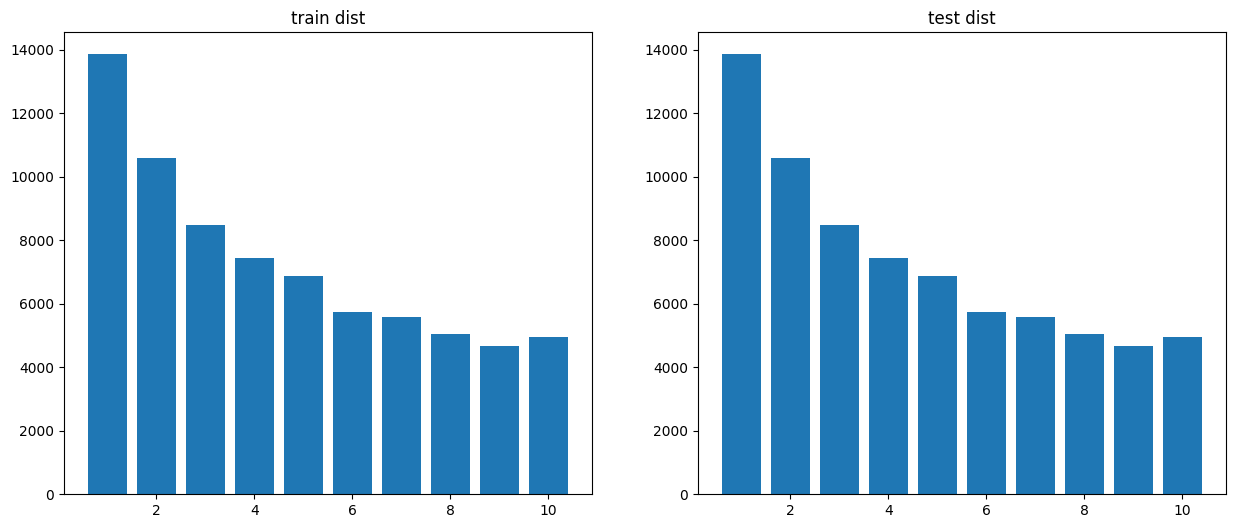

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.bar(train_dist.keys(), train_dist.values())
plt.title("train dist")
plt.subplot(1, 2, 2)
plt.bar(test_dist.keys(), test_dist.values())
plt.title("test dist")
plt.show()

## Preprocessing

In [ ]:
X_train.min(), X_train.max()

(0, 255)

### Normalization

In [ ]:
def normalizer(X):
    X = X / 255
    return X

In [ ]:
X_train_norm = normalizer(X_train)
X_test_norm = normalizer(X_test)

In [ ]:
X_train_norm

array([[[[0.12941176, 0.32941176, 0.0745098 , ..., 0.36078431,
          0.74509804, 0.84705882],
         [0.11764706, 0.29803922, 0.21176471, ..., 0.30588235,
          0.7372549 , 0.85098039],
         [0.14901961, 0.23137255, 0.43137255, ..., 0.39607843,
          0.74901961, 0.83137255]],

        [[0.05882353, 0.3372549 , 0.07843137, ..., 0.36862745,
          0.80392157, 0.86666667],
         [0.09019608, 0.28627451, 0.20392157, ..., 0.32156863,
          0.79607843, 0.87058824],
         [0.0745098 , 0.25882353, 0.43529412, ..., 0.41176471,
          0.80784314, 0.85098039]],

        [[0.05882353, 0.30196078, 0.09803922, ..., 0.44705882,
          0.8627451 , 0.88627451],
         [0.06666667, 0.30588235, 0.22352941, ..., 0.39607843,
          0.85490196, 0.89019608],
         [0.0745098 , 0.21960784, 0.45490196, ..., 0.49019608,
          0.8627451 , 0.86666667]],

        ...,

        [[0.28235294, 0.35294118, 0.25490196, ..., 0.78431373,
          0.89803922, 0.78431373],


In [ ]:
np.shape(X_train_norm)

(32, 32, 3, 73257)

In [ ]:
# gray_scale
def convert_gray(X):
    return np.mean(X, axis=2, keepdims=True)

In [ ]:
X_train_norm_gray = convert_gray(X_train_norm)
X_test_norm_gray = convert_gray(X_test_norm)

In [ ]:
X_train_norm_gray.shape, X_test_norm_gray.shape

((32, 32, 1, 73257), (32, 32, 1, 26032))

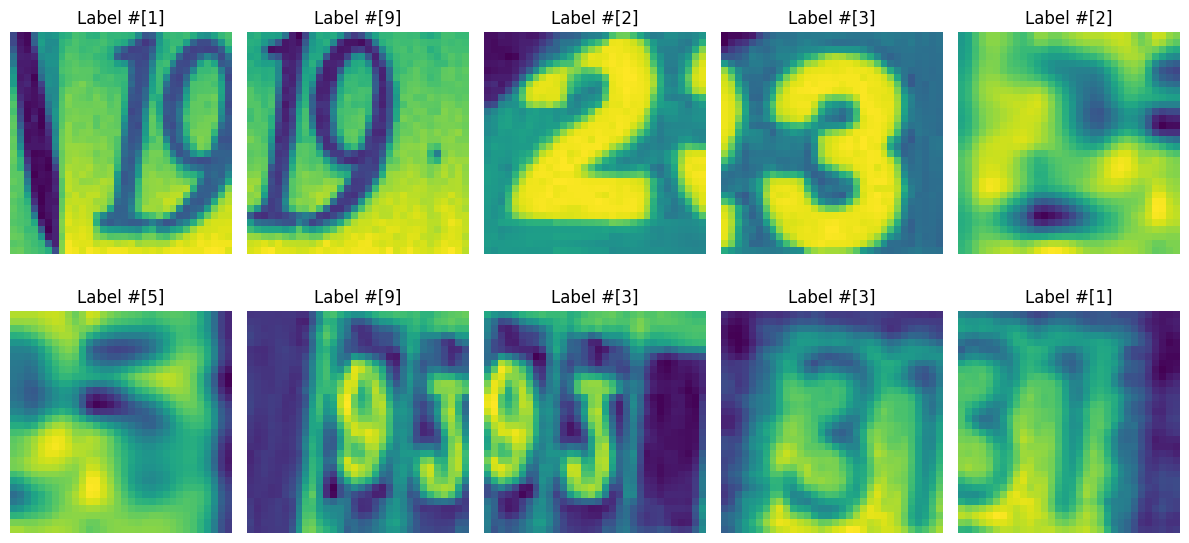

In [ ]:
image_vis(X_train_norm_gray, y_train)

In [ ]:
# Reshape to prepare inputs
def reshape(X):
  return X.transpose(3, 0, 1, 2).reshape(X.shape[3], -1)

In [ ]:
X_tr = reshape(X_train_norm_gray)
X_ts = reshape(X_test_norm_gray)

In [ ]:
X_tr.shape, X_ts.shape

((73257, 1024), (26032, 1024))

In [ ]:
X_tr_rgb = reshape(X_train_norm)
X_ts_rgb = reshape(X_test_norm)

In [ ]:
X_tr_rgb.shape, X_ts_rgb.shape

((73257, 3072), (26032, 3072))

## Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=20, n_estimators=100)
rf_clf.fit(X_tr, y_train)

<ipython-input-34-1bf58251ec06>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_tr, y_train)


RandomForestClassifier(max_depth=20)

In [ ]:
y_pred = rf_clf.predict(X_ts)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6915334972341733

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_tr_pca = pca.fit_transform(X_tr)
X_ts_pca = pca.transform(X_ts)

In [ ]:
X_tr_pca.shape, X_ts_pca.shape

((73257, 1024), (26032, 1024))

In [ ]:
# cumulative percentage of components' importance
cum_variances = np.cumsum(X_tr_pca)
cum_variances

array([-6.43644644e+00, -7.09953156e+00, -7.22449625e+00, ...,
        7.14638317e-04, -7.14062503e-05,  1.68043445e-09])

In [ ]:
plt.plot(cum_variances)